# The Bitcoin Episode

In [1]:
import numpy
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
def CryptoData(symbol, frequency):
    url = 'https://poloniex.com/public?command=returnChartData&currencyPair='+symbol+'&end=9999999999&period='+str(frequency)+'&start=0'
    print(url)
    df = pd.read_json(url) #Retrieves json data stores it in df
    #Reordering the columns in ohlc form
    df = df[['date', 'open', 'high', 'low', 'close', 'quoteVolume', 'volume', 'weightedAverage']]
    df.set_index('date', inplace=True)
    #Removing high values < opening values. Either method works, df.query doesn't when spaces are present in column names
    #df = df.query('high > open')
    df = df[df.high > df.open]
    df.to_csv('BitcoinUSD.csv') # Store in Bitcoin.csv
    
    
    return df

In [4]:
#df = CryptoData('USDT_BTC', 86400)
#close tells python to store the only 'closing' prices data to df.

df = pd.read_csv('BitcoinUSD.csv')


In [5]:
df.tail()

,date,open,high,low,close,quoteVolume,volume,weightedAverage
964,2017-12-05,11600.000000,11867.00,11411.707415,11665.138756,4869.061174,5.678390e+07,11662.187078
965,2017-12-06,11665.138756,13666.00,11641.000000,13580.905388,11194.928898,1.412979e+08,12621.597626
966,2017-12-07,13580.905388,16672.00,13092.272855,16563.507434,16534.348507,2.441697e+08,14767.421319
967,2017-12-08,16563.507434,17200.00,13900.000000,15847.678031,14970.350924,2.304207e+08,15391.800332
968,2017-12-09,15847.678031,16234.14,12919.000000,14785.000000,9153.268007,1.317163e+08,14390.081700


In [6]:
df.head()

,date,open,high,low,close,quoteVolume,volume,weightedAverage
0,2015-02-20,240.250118,245.000,240.25,240.25,0.230429,55.894897,242.568479
1,2015-02-22,245.000000,249.000,235.00,235.00,0.539055,129.121248,239.532608
2,2015-02-23,235.000002,235.001,235.00,235.00,0.410926,96.567562,235.000062
3,2015-02-24,235.000000,239.750,235.00,239.75,0.626749,149.154393,237.981177
4,2015-02-26,237.750000,239.800,237.75,238.50,0.000650,0.155488,239.116563


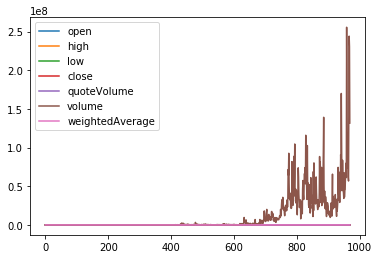

In [7]:
df.plot()

### Time Series

In [8]:
import plotly.plotly as py
import plotly.graph_objs as go

# Create a trace
trace = go.Scatter(
    x = df.index,
    y = df['close']
)

data = [trace]

py.iplot(data, filename='Bitcoin Closing Prices')

### OHLC chart

In [9]:
import plotly.plotly as py
from plotly.tools import FigureFactory as FF
from datetime import datetime


fig = FF.create_ohlc(df.loc[:,'open'], df.loc[:,'high'], df.loc[:,'low'], df.loc[:,'close'], dates=df.index)

fig['layout'].update({
    'title': 'The rise of Bitcoin',
    'yaxis': {'title': 'Bitcoin in USD'}    
    })

py.iplot(fig, filename='financeBTC-OHLC')



C:\Users\admin\AppData\Local\Programs\Python\Python36-32\lib\site-packages\plotly\tools.py:1422: UserWarning:

plotly.tools.FigureFactory.create_ohlc is deprecated. Use plotly.figure_factory.create_ohlc



### Rise of Bitcoin in the last quarter of 2017 

In [10]:
df = pd.read_csv('BitcoinUSD.csv')
# Selects only the last 3 months
df_DATE = df[df.date > '2017-10-01']
df_DATE.date = pd.to_datetime(df_DATE.date)
df_DATE.set_index('date', inplace=True)
print(df_DATE)

                    open          high           low         close  \
date                                                                 
2017-10-02   4412.793486   4487.000000   4358.000000   4401.000000   
2017-10-03   4401.000000   4434.012340   4216.000000   4308.880000   
2017-10-04   4311.053418   4350.835757   4173.305600   4213.300426   
2017-10-05   4213.300426   4368.586923   4131.000000   4317.065471   
2017-10-06   4317.065471   4423.754926   4298.320000   4371.636239   
2017-10-07   4371.636239   4480.000000   4314.000000   4440.000000   
2017-10-08   4440.000000   4633.392258   4420.716044   4611.000000   
2017-10-09   4617.757573   4888.000000   4553.126404   4787.657550   
2017-10-10   4782.869892   4939.130000   4714.832729   4770.000000   
2017-10-11   4770.000000   4875.478502   4720.000000   4820.000000   
2017-10-12   4826.000000   5444.367500   4820.000000   5441.554600   
2017-10-13   5444.367500   5862.000000   5385.600000   5646.629144   
2017-10-14   5646.81

C:\Users\admin\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [11]:
import plotly.plotly as py
from plotly.tools import FigureFactory as FF
from datetime import datetime



fig = FF.create_ohlc(df_DATE.loc[:,'open'], df_DATE.loc[:,'high'], df_DATE.loc[:,'low'], df_DATE.loc[:,'close'], dates=df_DATE.index)

fig['layout'].update({
    'title': 'Bitcoin in late 2017 ',
    'yaxis': {'title': 'Bitcoin in USD'}    
    })
    

py.iplot(fig, filename='financeBTC-OHLC')


C:\Users\admin\AppData\Local\Programs\Python\Python36-32\lib\site-packages\plotly\tools.py:1422: UserWarning:

plotly.tools.FigureFactory.create_ohlc is deprecated. Use plotly.figure_factory.create_ohlc



### Candlestick Chart

In [12]:
import plotly.plotly as py
import plotly.graph_objs as go


#df = CryptoData('USDT_BTC', 86400)

trace = go.Candlestick(x=df.index,
                       open=df.open,
                       high=df.high,
                       low=df.low,
                       close=df.close)
data = [trace]
py.iplot(data, filename='Bitcoin_simple_candlestick')

### Relative Strength

In [14]:
import cufflinks as cf
import pandas as pd

cf.set_config_file(world_readable=True,offline=False)
df = pd.read_csv('BitcoinUSD.csv')
# plot the rsi for closing values of bitcoin, period can be 14 or 21 days (commonly used)
df['close'].ta_plot(study='rsi',periods=14,title='Relative Strength Index for Bitcoin')


### Simple Moving Average 

In [10]:
import cufflinks as cf
df = pd.read_csv('BitcoinUSD.csv')
qf=cf.QuantFig(df,title='Simple Moving Average Band for Bitcoin',legend='top',name='BTC',rangeslider=True)
qf.add_sma([20,50],width=2,color=['green','lightgreen'],legendgroup=True)
qf.iplot()

### Bollinger Band 

In [15]:
df = pd.read_csv('BitcoinUSD.csv') 
# qf = quant fig
qf=cf.QuantFig(df,title='Bollinger Band for Bitcoin',legend='top',name='BTC', rangeslider=True,)
qf.add_bollinger_bands()
qf.iplot()